In [134]:
from sklearn.metrics import classification_report
import os
from sklearn.metrics import confusion_matrix
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import model_selection, preprocessing, metrics, ensemble, naive_bayes, linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
import nltk
import tensorflow as tf
from sklearn import preprocessing
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
import random
from xgboost import XGBClassifier
import time

In [113]:
df = pd.read_csv(r'Dataset.csv')

In [114]:
df.head()

,Unnamed: 0,Song Name,Genre,Tempo,Beats_Mean,Beats_SD,Beats_1,Beats_1_SD,Beats_2,Beats_2_SD,...,STFT_12_1,STFT_12_1_SD,STFT_12_2,STFT_12_2_SD,STFT_12_3,STFT_12_3_SD,STFT_12_4,STFT_12_4_SD,STFT_12_5,STFT_12_5_SD
0,0,blues.00000,blues,123.046875,631.098361,363.273040,135.307692,77.485864,394.500000,71.721103,...,0.360912,0.306167,0.394035,0.274264,0.371622,0.271165,0.337571,0.256537,0.460110,0.332735
1,1,blues.00001,blues,67.999589,626.941176,370.204470,117.571429,76.144331,380.142857,76.006444,...,0.483023,0.270392,0.294946,0.240578,0.228129,0.245542,0.279131,0.256822,0.385768,0.253855
2,2,blues.00002,blues,161.499023,638.727273,364.188214,137.437500,76.151140,401.437500,75.893815,...,0.536629,0.339453,0.502290,0.345287,0.686320,0.350614,0.619982,0.330648,0.597478,0.368183
3,3,blues.00003,blues,63.024009,588.892857,334.657750,132.666667,71.247612,381.833333,70.706946,...,0.348773,0.343449,0.406141,0.342834,0.424358,0.360890,0.386342,0.327595,0.349465,0.303100
4,4,blues.00004,blues,135.999178,640.136364,369.197774,134.571429,78.570000,399.230769,72.615059,...,0.247868,0.214111,0.307350,0.253906,0.279017,0.209529,0.300079,0.211344,0.230249,0.187255


In [115]:
df = df.sample(frac=1).reset_index(drop=True)

In [116]:
df.head()

,Unnamed: 0,Song Name,Genre,Tempo,Beats_Mean,Beats_SD,Beats_1,Beats_1_SD,Beats_2,Beats_2_SD,...,STFT_12_1,STFT_12_1_SD,STFT_12_2,STFT_12_2_SD,STFT_12_3,STFT_12_3_SD,STFT_12_4,STFT_12_4_SD,STFT_12_5,STFT_12_5_SD
0,293,country.00093,country,86.132812,619.595238,365.842996,121.111111,73.283990,394.111111,77.730938,...,0.149727,0.209647,0.257258,0.361308,0.206903,0.299516,0.203994,0.301832,0.205054,0.270712
1,978,rock.00078,rock,99.384014,593.888889,342.603186,119.000000,67.993464,356.444444,67.906981,...,0.498799,0.322212,0.299644,0.252775,0.228645,0.208432,0.335407,0.253260,0.277329,0.229559
2,132,classical.00032,classical,103.359375,634.437500,346.060622,157.100000,71.568778,412.000000,75.288777,...,0.140701,0.189802,0.135167,0.139561,0.074600,0.098088,0.153734,0.173352,0.176123,0.133869
3,887,reggae.00087,reggae,83.354335,618.230769,349.762004,136.250000,71.140266,385.500000,71.029923,...,0.515735,0.305537,0.537594,0.351125,0.464829,0.292321,0.407135,0.322346,0.430699,0.315258
4,567,jazz.00067,jazz,99.384014,632.122449,363.047342,131.700000,74.037896,387.900000,73.305457,...,0.111597,0.188841,0.345629,0.372253,0.316785,0.322037,0.183546,0.258258,0.250100,0.234123


In [117]:
df.columns.values

array(['Unnamed: 0', 'Song Name', 'Genre', 'Tempo', 'Beats_Mean',
       'Beats_SD', 'Beats_1', 'Beats_1_SD', 'Beats_2', 'Beats_2_SD',
       'Beats_3', 'Beats_3_SD', 'Beats_4', 'Beats_4_SD', 'Beats_5',
       'Beats_5_SD', 'RMSE', 'RMSE_SD', 'RMSE_1', 'RMSE_1_SD', 'RMSE_2',
       'RMSE_2_SD', 'RMSE_3', 'RMSE_3_SD', 'RMSE_4', 'RMSE_4_SD',
       'RMSE_5', 'RMSE_5_SD', 'SPEC_CENT', 'SPEC_CENT_SD', 'SPEC_CENT_1',
       'SPEC_CENT_1_SD', 'SPEC_CENT_2', 'SPEC_CENT_2_SD', 'SPEC_CENT_3',
       'SPEC_CENT_3_SD', 'SPEC_CENT_4', 'SPEC_CENT_4_SD', 'SPEC_CENT_5',
       'SPEC_CENT_5_SD', 'SPEC_BW', 'SPEC_BW_SD', 'SPEC_BW_1',
       'SPEC_BW_1_SD', 'SPEC_BW_2', 'SPEC_BW_2_SD', 'SPEC_BW_3',
       'SPEC_BW_3_SD', 'SPEC_BW_4', 'SPEC_BW_4_SD', 'SPEC_BW_5',
       'SPEC_BW_5_SD', 'ROLLOFF', 'ROLLOFF_SD', 'ROLLOFF_1',
       'ROLLOFF_1_SD', 'ROLLOFF_2', 'ROLLOFF_2_SD', 'ROLLOFF_3',
       'ROLLOFF_3_SD', 'ROLLOFF_4', 'ROLLOFF_4_SD', 'ROLLOFF_5',
       'ROLLOFF_5_SD', 'ZCR', 'ZCR_SD', 'ZCR_1', 'ZCR_

In [118]:
x = df.drop(['Song Name', 'Genre', 'Unnamed: 0'], axis = 1)
y = df['Genre']

In [119]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

In [120]:
scaler = preprocessing.StandardScaler()
x = scaler.fit_transform(x) 

In [121]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [122]:
model = XGBClassifier()

In [123]:
parameters = {'max_depth':[3, 6], 'n_estimators':[40, 50, 60, 70, 80, 90, 100], 'gamma':[0.01, 0.03, 0.05, 0.08, 0.1, 0.2],
              'learning_rate':[0.05, 0.07, 0.1, 0.125, 0.15, 0.2]}

rsc = RandomizedSearchCV(estimator = model, param_distributions = parameters, cv = 3, n_iter = 50, scoring = 'neg_log_loss', verbose = 0, n_jobs = -1)

In [128]:
%time grid_result = rsc.fit(x_train, y_train)
best_params = grid_result.best_params_
print(best_params)

C:\Users\ADMIN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Wall time: 26min 57s
{'n_estimators': 90, 'max_depth': 3, 'learning_rate': 0.15, 'gamma': 0.05}


In [165]:
%time model.fit(x_train, y_train)
%time print(model.score(x_test, y_test))

Wall time: 40.5 s
0.688
Wall time: 46.9 ms


In [133]:
predictions=model.predict(x_test)
cm=confusion_matrix(y_test, predictions)
print('Predicted confusion Matrix:')
print(cm)
print('')
print('Classification Report: ')
target_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
print(classification_report(y_test, predictions, target_names=target_names))

Predicted confusion Matrix:
[[15  0  2  0  0  2  2  0  0  0]
 [ 0 20  0  0  0  5  0  0  0  0]
 [ 1  0 21  1  0  0  1  2  0  1]
 [ 1  0  1 15  5  0  0  1  0  3]
 [ 2  0  1  0 12  0  1  1  5  1]
 [ 0  2  3  1  0 14  0  0  0  1]
 [ 0  0  0  0  0  0 26  0  0  2]
 [ 0  0  2  3  0  1  0 21  1  1]
 [ 0  0  1  0  2  0  0  2 15  1]
 [ 2  1  5  5  0  0  1  0  2 13]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        21
           1       0.87      0.80      0.83        25
           2       0.58      0.78      0.67        27
           3       0.60      0.58      0.59        26
           4       0.63      0.52      0.57        23
           5       0.64      0.67      0.65        21
           6       0.84      0.93      0.88        28
           7       0.78      0.72      0.75        29
           8       0.65      0.71      0.68        21
           9       0.57      0.45      0.50        29

    accuracy        

In [158]:
from sklearn import svm
clf = svm.LinearSVC(C=1.0)

In [160]:
parameters_svm = {'C':[0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.15]}
rsc_svm = RandomizedSearchCV(estimator = clf, param_distributions = parameters_svm, cv = 3, n_iter = 50, verbose = 0, n_jobs = -1)

In [161]:
%time grid_result_svm = rsc_svm.fit(x_train, y_train)
best_params_svm = grid_result_svm.best_params_
print(best_params_svm)

C:\Users\ADMIN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 8 is smaller than n_iter=50. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\Users\ADMIN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Wall time: 11.5 s
{'C': 0.001}


In [162]:
%time clf.fit(x_train, y_train)
%time print(clf.score(x_test, y_test))

Wall time: 2.92 s
0.576
Wall time: 2 ms


C:\Users\ADMIN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [163]:
predictions=clf.predict(x_test)
cm=confusion_matrix(y_test, predictions)
print('Predicted confusion Matrix:')
print(cm)
print('')
print('Classification Report: ')
target_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
print(classification_report(y_test, predictions, target_names=target_names))

Predicted confusion Matrix:
[[10  1  1  0  0  0  3  0  3  3]
 [ 2 17  0  1  0  1  0  0  2  2]
 [ 1  1 13  3  1  0  1  1  2  4]
 [ 0  0  1 10  6  1  1  6  1  0]
 [ 1  0  1  2 11  1  1  0  6  0]
 [ 0  1  1  0  0 15  0  0  2  2]
 [ 1  0  0  0  2  0 22  0  0  3]
 [ 2  0  3  0  3  0  0 20  1  0]
 [ 1  0  1  2  2  1  0  0 14  0]
 [ 0  1  3  6  2  2  0  2  1 12]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.56      0.48      0.51        21
           1       0.81      0.68      0.74        25
           2       0.54      0.48      0.51        27
           3       0.42      0.38      0.40        26
           4       0.41      0.48      0.44        23
           5       0.71      0.71      0.71        21
           6       0.79      0.79      0.79        28
           7       0.69      0.69      0.69        29
           8       0.44      0.67      0.53        21
           9       0.46      0.41      0.44        29

    accuracy        

In [99]:
from keras.layers import Input, Dense, BatchNormalization, Activation, Dropout 
from keras.models import Model

inputs = Input(shape=(457,))

x = Dense(64)(inputs)
x = BatchNormalization()(x)
x = Dropout(0.25)(x)
x = Activation('relu')(x)

x = Dense(64)(inputs)
x = BatchNormalization()(x)
x = Dropout(0.25)(x)
x = Activation('relu')(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = Dropout(0.25)(x)
x = Activation('relu')(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = Dropout(0.25)(x)
x = Activation('relu')(x)

x = Dense(64)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Dense(32)(x)
x = BatchNormalization()(x)
x = Dropout(0.25)(x)
x = Activation('relu')(x)

x = Dense(32)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Dense(16)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

predictions = Dense(10, activation = 'softmax')(x)

model = Model(inputs = inputs, outputs = predictions)
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [100]:
training_res = model.fit(x_train, y_train, batch_size = 32, epochs = 500, validation_split = 0.2)

Train on 600 samples, validate on 150 samples
Epoch 1/500
600/600 [==============================] - 2s 3ms/step - loss: 2.2673 - accuracy: 0.1800 - val_loss: 4.3983 - val_accuracy: 0.2600
Epoch 2/500
600/600 [==============================] - 0s 227us/step - loss: 1.8993 - accuracy: 0.3183 - val_loss: 5.4783 - val_accuracy: 0.2667
Epoch 3/500
600/600 [==============================] - 0s 227us/step - loss: 1.7157 - accuracy: 0.3600 - val_loss: 3.2475 - val_accuracy: 0.3133
Epoch 4/500
600/600 [==============================] - 0s 220us/step - loss: 1.5743 - accuracy: 0.4100 - val_loss: 2.5344 - val_accuracy: 0.3867
Epoch 5/500
600/600 [==============================] - 0s 218us/step - loss: 1.5391 - accuracy: 0.4317 - val_loss: 1.9900 - val_accuracy: 0.3800
Epoch 6/500
600/600 [==============================] - 0s 240us/step - loss: 1.3925 - accuracy: 0.4933 - val_loss: 1.9894 - val_accuracy: 0.4333
Epoch 7/500
600/600 [==============================] - 0s 242us/step - loss: 1.3643 - 

Epoch 57/500
600/600 [==============================] - 0s 228us/step - loss: 0.3404 - accuracy: 0.8833 - val_loss: 1.5144 - val_accuracy: 0.6733
Epoch 58/500
600/600 [==============================] - 0s 225us/step - loss: 0.3694 - accuracy: 0.8800 - val_loss: 1.4513 - val_accuracy: 0.6600
Epoch 59/500
600/600 [==============================] - 0s 223us/step - loss: 0.4501 - accuracy: 0.8783 - val_loss: 1.5556 - val_accuracy: 0.6467
Epoch 60/500
600/600 [==============================] - 0s 238us/step - loss: 0.3620 - accuracy: 0.8933 - val_loss: 1.4333 - val_accuracy: 0.6600
Epoch 61/500
600/600 [==============================] - 0s 232us/step - loss: 0.3351 - accuracy: 0.9117 - val_loss: 1.4517 - val_accuracy: 0.6600
Epoch 62/500
600/600 [==============================] - 0s 240us/step - loss: 0.3324 - accuracy: 0.9017 - val_loss: 1.4364 - val_accuracy: 0.6933
Epoch 63/500
600/600 [==============================] - 0s 223us/step - loss: 0.2845 - accuracy: 0.9083 - val_loss: 1.3522 -

600/600 [==============================] - 0s 233us/step - loss: 0.2210 - accuracy: 0.9383 - val_loss: 1.5748 - val_accuracy: 0.6600
Epoch 114/500
600/600 [==============================] - 0s 222us/step - loss: 0.3134 - accuracy: 0.9133 - val_loss: 1.4182 - val_accuracy: 0.7200
Epoch 115/500
600/600 [==============================] - 0s 228us/step - loss: 0.2208 - accuracy: 0.9400 - val_loss: 1.4466 - val_accuracy: 0.7067
Epoch 116/500
600/600 [==============================] - 0s 235us/step - loss: 0.2311 - accuracy: 0.9383 - val_loss: 1.5431 - val_accuracy: 0.6933
Epoch 117/500
600/600 [==============================] - 0s 227us/step - loss: 0.2342 - accuracy: 0.9317 - val_loss: 1.5345 - val_accuracy: 0.7000
Epoch 118/500
600/600 [==============================] - 0s 235us/step - loss: 0.1760 - accuracy: 0.9517 - val_loss: 1.5834 - val_accuracy: 0.6800
Epoch 119/500
600/600 [==============================] - 0s 220us/step - loss: 0.2055 - accuracy: 0.9417 - val_loss: 1.5265 - val_ac

Epoch 224/500
600/600 [==============================] - 0s 232us/step - loss: 0.1522 - accuracy: 0.9567 - val_loss: 1.7702 - val_accuracy: 0.6733
Epoch 225/500
600/600 [==============================] - 0s 233us/step - loss: 0.1508 - accuracy: 0.9533 - val_loss: 1.6604 - val_accuracy: 0.6933
Epoch 226/500
600/600 [==============================] - 0s 232us/step - loss: 0.1927 - accuracy: 0.9450 - val_loss: 1.6777 - val_accuracy: 0.6867
Epoch 227/500
600/600 [==============================] - 0s 259us/step - loss: 0.1535 - accuracy: 0.9600 - val_loss: 1.6757 - val_accuracy: 0.7000
Epoch 228/500
600/600 [==============================] - 0s 260us/step - loss: 0.1286 - accuracy: 0.9500 - val_loss: 1.6893 - val_accuracy: 0.7200
Epoch 229/500
600/600 [==============================] - 0s 238us/step - loss: 0.1478 - accuracy: 0.9617 - val_loss: 1.7490 - val_accuracy: 0.6933
Epoch 230/500
600/600 [==============================] - 0s 225us/step - loss: 0.1557 - accuracy: 0.9483 - val_loss: 1

Epoch 335/500
600/600 [==============================] - 0s 233us/step - loss: 0.0816 - accuracy: 0.9817 - val_loss: 1.4676 - val_accuracy: 0.7200
Epoch 336/500
600/600 [==============================] - 0s 235us/step - loss: 0.0786 - accuracy: 0.9767 - val_loss: 1.4822 - val_accuracy: 0.7267
Epoch 337/500
600/600 [==============================] - 0s 243us/step - loss: 0.1154 - accuracy: 0.9633 - val_loss: 1.5215 - val_accuracy: 0.7000
Epoch 338/500
600/600 [==============================] - 0s 223us/step - loss: 0.1246 - accuracy: 0.9667 - val_loss: 1.5631 - val_accuracy: 0.7400
Epoch 339/500
600/600 [==============================] - 0s 225us/step - loss: 0.1101 - accuracy: 0.9633 - val_loss: 1.6095 - val_accuracy: 0.7267
Epoch 340/500
600/600 [==============================] - 0s 223us/step - loss: 0.1468 - accuracy: 0.9567 - val_loss: 1.6374 - val_accuracy: 0.6933
Epoch 341/500
600/600 [==============================] - 0s 222us/step - loss: 0.0994 - accuracy: 0.9733 - val_loss: 1

Epoch 391/500
600/600 [==============================] - 0s 238us/step - loss: 0.0784 - accuracy: 0.9817 - val_loss: 1.8322 - val_accuracy: 0.7200
Epoch 392/500
600/600 [==============================] - 0s 232us/step - loss: 0.0651 - accuracy: 0.9833 - val_loss: 1.8380 - val_accuracy: 0.7000
Epoch 393/500
600/600 [==============================] - 0s 228us/step - loss: 0.0859 - accuracy: 0.9750 - val_loss: 1.8621 - val_accuracy: 0.6867
Epoch 394/500
600/600 [==============================] - 0s 228us/step - loss: 0.1226 - accuracy: 0.9717 - val_loss: 1.8390 - val_accuracy: 0.7067
Epoch 395/500
600/600 [==============================] - 0s 232us/step - loss: 0.1328 - accuracy: 0.9700 - val_loss: 1.7794 - val_accuracy: 0.7067
Epoch 396/500
600/600 [==============================] - 0s 225us/step - loss: 0.0864 - accuracy: 0.9817 - val_loss: 1.7382 - val_accuracy: 0.6933
Epoch 397/500
600/600 [==============================] - 0s 225us/step - loss: 0.0995 - accuracy: 0.9667 - val_loss: 1

Epoch 447/500
600/600 [==============================] - 0s 233us/step - loss: 0.0646 - accuracy: 0.9817 - val_loss: 1.7674 - val_accuracy: 0.6933
Epoch 448/500
600/600 [==============================] - 0s 228us/step - loss: 0.1288 - accuracy: 0.9700 - val_loss: 1.7107 - val_accuracy: 0.6867
Epoch 449/500
600/600 [==============================] - 0s 227us/step - loss: 0.1133 - accuracy: 0.9767 - val_loss: 1.5827 - val_accuracy: 0.7000
Epoch 450/500
600/600 [==============================] - 0s 227us/step - loss: 0.0810 - accuracy: 0.9767 - val_loss: 1.6703 - val_accuracy: 0.7200
Epoch 451/500
600/600 [==============================] - 0s 225us/step - loss: 0.2197 - accuracy: 0.9483 - val_loss: 1.6333 - val_accuracy: 0.7133
Epoch 452/500
600/600 [==============================] - 0s 240us/step - loss: 0.0848 - accuracy: 0.9800 - val_loss: 1.5649 - val_accuracy: 0.7067
Epoch 453/500
600/600 [==============================] - 0s 235us/step - loss: 0.0775 - accuracy: 0.9783 - val_loss: 1

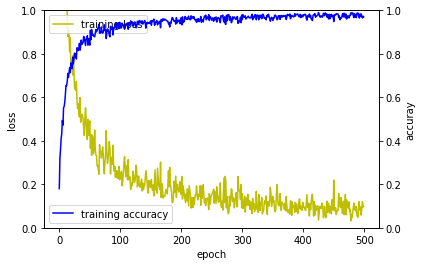

In [101]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.set_ylim([0.0, 1.0])
acc_ax.set_ylim([0.0, 1.0])

loss_ax.plot(training_res.history['loss'], 'y', label='training loss')
acc_ax.plot(training_res.history['accuracy'], 'b', label='training accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [102]:
y_pred = model.predict(x_test)
y_pred = y_pred.round()

In [103]:
y_pred_abs = []
maxx = 0
t = 0
for i in range(0, y_pred.shape[0]):
    for j in range(0, y_pred.shape[1]):
        if y_pred[i][j] >= maxx:
            maxx = y_pred[i][j]
            t = j
    y_pred_abs.append(t)

In [104]:
len(y_pred_abs)

250

In [105]:
unique, counts = np.unique(y_pred_abs, return_counts=True)
print(np.asarray((unique, counts)).T)

[[ 0 33]
 [ 1 34]
 [ 2 26]
 [ 3 15]
 [ 4 22]
 [ 5 20]
 [ 6 27]
 [ 7 30]
 [ 8 25]
 [ 9 18]]


In [106]:
target_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
print(classification_report(y_test, y_pred_abs, target_names = target_names))

              precision    recall  f1-score   support

           0       0.67      0.85      0.75        26
           1       0.88      1.00      0.94        30
           2       0.69      0.58      0.63        31
           3       0.67      0.48      0.56        21
           4       0.64      0.82      0.72        17
           5       0.75      0.83      0.79        18
           6       0.81      0.92      0.86        24
           7       0.97      0.91      0.94        32
           8       0.72      0.82      0.77        22
           9       0.78      0.48      0.60        29

    accuracy                           0.77       250
   macro avg       0.76      0.77      0.75       250
weighted avg       0.77      0.77      0.76       250

